importando bibliotecas

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

dataframe

In [177]:
cancer = load_breast_cancer()
dt = cancer.data
tg = np.reshape(cancer.target,(569,1))
final_data = np.concatenate([dt,tg],axis=1)
df = pd.DataFrame(final_data)
feats = cancer.feature_names
feat_label = np.append(feats,"Diagnosis")
df.columns = feat_label
print(df)
print(df.shape)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
y = df["Diagnosis"] #classes
x = df.drop("class",axis=1) #atributos
print(x)

escalando os dados

In [ ]:
scale = StandardScaler()
scaled_data = scale.fit_transform(x)
scaled_data_df = pd.DataFrame(scaled_data,columns=feats)
scaled_data_df.describe().round(3)

matriz de covariância, autovalores e autovetores

In [179]:
cov = scaled_data_df.cov()
print(cov)
autovalores = np.linalg.eigvals(cov)
print(autovalores)
sorted_array = np.argsort(autovalores)
sorted_values = autovalores[sorted_array]
rslt = sorted_values[-2: ]
print(f"dois maiores autovalores são: {rslt}")

a,v = np.linalg.eig(cov) #retorna autovalores e os autovetores associados a eles
idx = np.argsort(a)[::-1]
a = a[idx]
v = v[:,idx]

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.001761      0.324352        0.999612   0.989095   
mean texture                0.324352      1.001761        0.330113   0.321651   
mean perimeter              0.999612      0.330113        1.001761   0.988244   
mean area                   0.989095      0.321651        0.988244   1.001761   
mean smoothness             0.170882     -0.023430        0.207643   0.177340   
mean compactness            0.507015      0.237119        0.557917   0.499379   
mean concavity              0.677955      0.302950        0.717396   0.687191   
mean concave points         0.823977      0.293981        0.852475   0.824718   
mean symmetry               0.148001      0.071527        0.183349   0.151559   
mean fractal dimension     -0.312179     -0.076572       -0.261937  -0.283608   
radius error                0.680286      0.276354        0.692983   0.733852   
texture error              -

fazendo o PCA com 2 componentes principais


In [ ]:
pca = PCA(n_components= 2)
pca_data = pca.fit_transform(scaled_data_df)
pca_df = pd.DataFrame(pca_data,columns= ["Principal Component 1","Principal Component 2"])
pca_df.shape


In [178]:
print(f"Variância dos componentes principais 1 e 2, respectivamente: {pca.explained_variance_ratio_}")

Variância dos componentes principais 1 e 2, respectivamente: [0.44272026 0.18971182]


plotting: verde para câncer maligno e vermelho para câncer benigno

C:\Users\PC\AppData\Local\Temp\ipykernel_7944\889272554.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


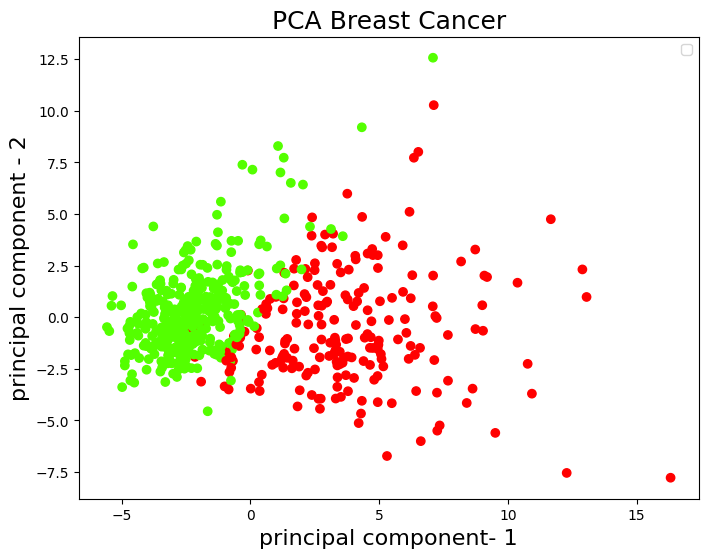

In [ ]:

plt.figure(figsize=(8,6))
plt.xlabel("principal component- 1",fontsize = 16)
plt.ylabel("principal component - 2",fontsize = 16)
plt.title("PCA Breast Cancer",fontsize= 18)
plt.scatter(pca_data[:,0],pca_data[:,1],c=cancer["target"],cmap="prism")



In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel("principal component- 1",fontsize = 16)
plt.ylabel("principal component - 2",fontsize = 16)
plt.title("PCA Breast Cancer",fontsize= 18)
targets = ["Malignant","Benign"]
colors = ["green","red"]
for target, color in zip(targets,colors):
    IndicesToKeep = df["Diagnosis"] == target
    plt.scatter()

In [ ]:
print(cancer["DESCR"])